### **Exploratory Data Analysis**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set(style = 'darkgrid')

df = pd.read_csv('D:\Crypto\Data\crypto_date.csv')

df.drop(columns='Unnamed: 0',inplace = True)

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df.dropna()

<>:9: SyntaxWarning: invalid escape sequence '\C'
<>:9: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Pallav\AppData\Local\Temp\ipykernel_6536\3929707507.py:9: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv('D:\Crypto\Data\crypto_date.csv')


In [11]:
names = df['name'].value_counts().head(10).index

In [12]:
names

Index(['Bitcoin', 'Litecoin', 'Binance Coin', 'XRP', 'Dogecoin', 'Stellar',
       'Tether', 'Ethereum', 'Chainlink', 'TRON'],
      dtype='object', name='name')

In [17]:
df = df[df['name'].isin(names)]
df

,symbol,name,date,price,total_volume,year
0,BTC,Bitcoin,2013-04-29,144.540000,0.000000e+00,2013
1,LTC,Litecoin,2013-04-29,4.383900,0.000000e+00,2013
2,LTC,Litecoin,2013-04-30,4.296490,0.000000e+00,2013
3,BTC,Bitcoin,2013-04-30,139.000000,0.000000e+00,2013
4,LTC,Litecoin,2013-05-01,3.801010,0.000000e+00,2013
...,...,...,...,...,...,...
60889,TRX,TRON,2025-08-11,0.341196,8.190033e+08,2025
60892,BNB,Binance Coin,2025-08-11,822.936000,2.253678e+09,2025
60894,ETH,Ethereum,2025-08-11,4331.640000,3.721826e+10,2025
60895,BTC,Bitcoin,2025-08-11,121785.000000,7.361615e+10,2025


In [19]:
t1 = df.pivot_table(index = 'date',columns = 'name',values = 'price',aggfunc='mean')

In [20]:
t1 = t1.fillna(0)

In [21]:
t1

name,Binance Coin,Bitcoin,Chainlink,Dogecoin,Ethereum,Litecoin,Stellar,TRON,Tether,XRP
date,,,,,,,,,,
2013-04-29,0.000,144.54,0.0000,0.000000,0.00,4.38390,0.000000,0.000000,0.0,0.00000
2013-04-30,0.000,139.00,0.0000,0.000000,0.00,4.29649,0.000000,0.000000,0.0,0.00000
2013-05-01,0.000,116.99,0.0000,0.000000,0.00,3.80101,0.000000,0.000000,0.0,0.00000
2013-05-02,0.000,105.21,0.0000,0.000000,0.00,3.37198,0.000000,0.000000,0.0,0.00000
2013-05-03,0.000,97.75,0.0000,0.000000,0.00,3.04491,0.000000,0.000000,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...
2025-08-06,761.007,114153.00,16.5026,0.201171,3637.49,118.04900,0.393026,0.333196,0.0,2.94967
2025-08-07,766.171,114379.00,16.6216,0.204269,3668.69,120.97900,0.399074,0.338898,0.0,2.97328
2025-08-09,800.203,116419.00,21.0035,0.230711,4079.83,123.98800,0.448181,0.337787,0.0,3.29887


In [23]:
corr = t1.corr()

name,Binance Coin,Bitcoin,Chainlink,Dogecoin,Ethereum,Litecoin,Stellar,TRON,Tether,XRP
name,,,,,,,,,,
Binance Coin,1.000000,0.947094,0.786888,0.876478,0.937771,0.527413,0.571871,0.897776,0.287178,0.749084
Bitcoin,0.947094,1.000000,0.781880,0.831100,0.875600,0.548735,0.641989,0.954608,0.301757,0.844160
Chainlink,0.786888,0.781880,1.000000,0.835320,0.854392,0.718137,0.714238,0.657643,0.301073,0.610325
Dogecoin,0.876478,0.831100,0.835320,1.000000,0.865299,0.601992,0.669216,0.778393,0.243277,0.736731
Ethereum,0.937771,0.875600,0.854392,0.865299,1.000000,0.657936,0.644363,0.791339,0.333368,0.674993
Litecoin,0.527413,0.548735,0.718137,0.601992,0.657936,1.000000,0.873122,0.500029,0.391882,0.617334
Stellar,0.571871,0.641989,0.714238,0.669216,0.644363,0.873122,1.000000,0.643546,0.354210,0.787596
TRON,0.897776,0.954608,0.657643,0.778393,0.791339,0.500029,0.643546,1.000000,0.292800,0.902059
Tether,0.287178,0.301757,0.301073,0.243277,0.333368,0.391882,0.354210,0.292800,1.000000,0.291729


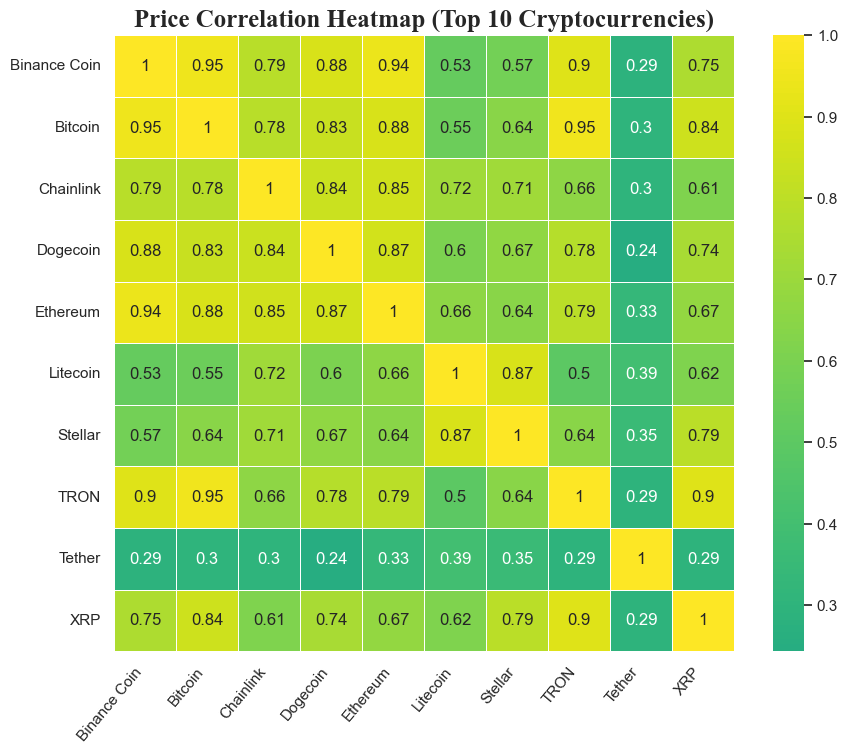

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="viridis", center=0, linewidths=0.5)
plt.title("Price Correlation Heatmap (Top 10 Cryptocurrencies)", fontsize=18, fontweight="bold",fontfamily = 'Times New Roman')
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation = 50,ha = 'right')
plt.show()